In [1]:
# Program to read the migration images, sums they and then saves the result in a binary file

# Modules from Python

import time
import matplotlib.pyplot as pl
import numpy as np
import multiprocessing as mp

In [2]:
# Modules created 
import parametro
import auxfunctionsmodule as aux
import fortransubroutines as fortran

In [3]:
start_time = time.time()

StackImage = np.zeros((parametro.Nz,parametro.Nx)) # variable responsible for storing the migrated images

In [4]:
# Loads the source position
Fx, Fz = np.loadtxt('posicoes_fonte.dat',dtype = 'int',unpack = True)
N_shot = np.size(Fx)


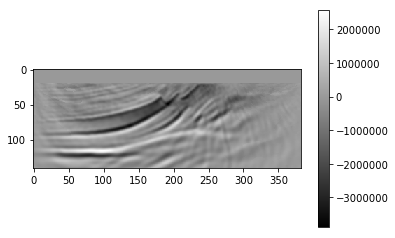

In [5]:
# Loop to construct the final image

di = 20 # depth index
for shot in np.arange(1,N_shot+1):
            filename_imagem = "../Imagem/"'%s'%(parametro.nome_prin)+"_shot" + '%03d'%(shot) + ".bin"
            Imagem  =  aux.readbinaryfile(parametro.Nz,parametro.Nx,filename_imagem)     
            StackImage[di:,:]= Imagem[di:,:]+ StackImage[di:,:]

aux.plotmodel(StackImage,'gray')
pl.show()

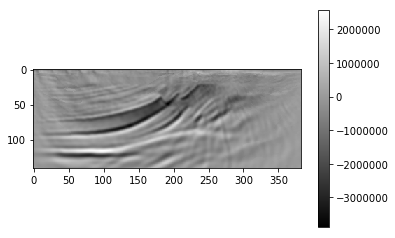

In [6]:
# Loop to construct the final image

StackImage_2 = np.zeros((parametro.Nz,parametro.Nx)) # variable responsible for storing the migrated images
for shot in np.arange(1,N_shot+1):
            filename_imagem = "../Imagem/"'%s'%(parametro.nome_prin)+"_shot" + '%03d'%(shot) + ".bin"
            Imagem_2  =  aux.readbinaryfile(parametro.Nz,parametro.Nx,filename_imagem)     
            StackImage_2= Imagem_2+ StackImage_2

aux.plotmodel(StackImage_2,'gray')
pl.show()

In [7]:
Stack = np.reshape(StackImage,[1,parametro.Nx*parametro.Nz], order = 'F')
StackImage.astype('float32').tofile("../Imagem/""Final_Image_"+'%s'%(parametro.nome_prin)+".bin",format='F')

In [8]:
filename = "../Imagem/Final_Image_"+'%s'%(parametro.nome_prin)+".bin"
Final_Image  =  aux.readbinaryfile(parametro.Nz,parametro.Nx,filename)

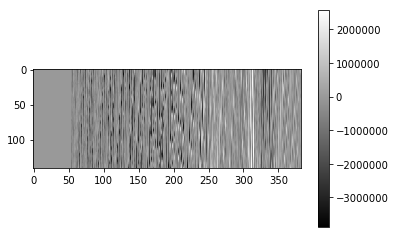

In [9]:
aux.plotmodel(Final_Image,'gray')
pl.show()

In [10]:
elapsed_time_python = time.time() - start_time
print ("Tempo de processamento python = ", elapsed_time_python, "s")

('Tempo de processamento python = ', 5.719310998916626, 's')
